# 1. Abstracto, motivación y audiencia

Este proyecto de data science tiene como objetivo analizar la evolución histórica del precio de Bitcoin utilizando un conjunto de datos que incluye información sobre la fecha, el precio en USD, el número de transacciones, la capitalización de mercado, la presencia de la tematica Bitcoin en redes sociales y otros indicadores relevantes.

La hipótesis principal de este proyecto es que el precio de Bitcoin ha sido influenciado por una variedad de factores, incluyendo la adopción por parte de grandes empresas, la regulación gubernamental, la oferta y la demanda del mercado y la actividad en las redes sociales. Se espera que este análisis proporcione una mejor comprensión de cómo estos factores han afectado al precio de Bitcoin a lo largo del tiempo y cómo podrían seguir influyendo en el futuro.

La audiencia principal de este proyecto es cualquier persona interesada en Bitcoin y en las criptomonedas en general, incluyendo inversores, entusiastas y empresas que podrían estar considerando la adopción de esta tecnología. Además, los resultados de este análisis podrían ser útiles para reguladores y responsables políticos que buscan comprender mejor los factores que influyen en el precio de Bitcoin y cómo podrían afectar la economía en general.

# 2. Preguntas/Hipótesis que queremos resolver mediante el análisis de datos

Algunas de las hipotesis que se buscan resolver con el análisis son las planteadas anteriormente en el archivo ProyectoDS_ParteI. Las mismas fueron las siguientes:

- La volatibilidad en el precio de Bitcoin ha sido sumamente elevada a lo largo de los años, lo que afecta directamente a la capitalización de mercado de este activo.

Para demostrar esto se realizó el siguiente gráfico

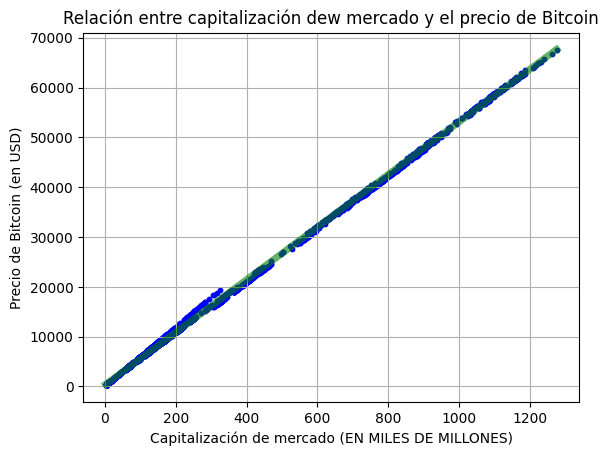

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

df = pd.read_csv('C:\\Users\\Administrador\\Desktop\\Data Scientist\\Data Science\\Proyecto\\GitHub\\Proyecto_DataScience_Coder\\data\\BTC_Data_final.csv')
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

df['marketcap_en_MM'] = df.apply(lambda row: row.marketcap / 1000000000, axis=1)
plt.scatter(df['marketcap_en_MM'], df['priceUSD'], s=10, c='blue')

m, b = np.polyfit(df['marketcap_en_MM'], df['priceUSD'], 1)
x = np.linspace(min(df['marketcap_en_MM']), max(df['marketcap_en_MM']), 100)
y = m * x + b

plt.plot(x, y, color='green', linewidth=5, alpha=0.60)

plt.title('Relación entre capitalización dew mercado y el precio de Bitcoin')
plt.xlabel('Capitalización de mercado (EN MILES DE MILLONES)')
plt.ylabel('Precio de Bitcoin (en USD)')
plt.grid(True)
plt.show()

# 3. Análisis Exploratorio de Datos (EDA)

En primer lugar para realizar el análisis exploratorio de datos es conveniente comprobar que no existan valores nulos, y a su vez obtener que tipos de datos hay en cada columna.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3180 entries, 0 to 3179
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    3180 non-null   datetime64[ns]
 1   priceUSD                3180 non-null   float64       
 2   size                    3180 non-null   float64       
 3   sentbyaddress           3180 non-null   int64         
 4   transactions            3180 non-null   int64         
 5   mining_profitability    3180 non-null   float64       
 6   sentinusd               3180 non-null   float64       
 7   transactionfees         3180 non-null   float64       
 8   median_transaction_fee  3180 non-null   float64       
 9   confirmationtime        3180 non-null   float64       
 10  marketcap               3180 non-null   int64         
 11  transactionvalue        3180 non-null   float64       
 12  mediantransactionvalue  3180 non-null   float64 

A continuación se utiliza la función "describe" para obtener valores relevantes de todo el data set.

In [19]:
df.describe()

,priceUSD,size,sentbyaddress,transactions,mining_profitability,sentinusd,transactionfees,median_transaction_fee,confirmationtime,marketcap,transactionvalue,mediantransactionvalue,tweets,google_trends,fee_to_reward,activeaddresses,top100cap,Year,Month,marketcap_en_MM
count,3180.000000,3180.000000,3180.000000,3180.000000,3180.000000,3.180000e+03,3180.000000,3180.000000,3180.000000,3.180000e+03,3.180000e+03,3180.000000,3180.000000,3180.000000,3180.000000,3.180000e+03,3180.000000,3180.000000,3180.000000,3180.000000
mean,12210.656699,702125.407547,370935.080818,236883.029560,1.957467,1.192082e+10,2.704139,1.309816,9.787805,2.257468e+11,1.246725e+05,406.650023,52725.178616,51.196511,4.113218,5.769545e+05,17.179965,2018.111950,6.642138,225.746823
std,16007.272397,208326.491540,132993.425162,84283.742917,5.041295,2.244176e+10,5.883913,3.093767,1.183435,3.026721e+11,2.371334e+05,452.258229,47209.368812,57.647266,5.351474,2.405334e+05,2.401756,2.518016,3.403399,302.672069
min,197.577000,162260.000000,70902.000000,47579.000000,0.052500,9.471432e+07,0.024100,0.009970,0.000000,2.655832e+09,1.166000e+03,0.091700,0.000000,5.268000,0.189000,0.000000e+00,0.000000,2014.000000,1.000000,2.655832
25%,603.998000,583895.250000,288086.750000,192269.500000,0.174000,9.354786e+08,0.154750,0.062175,9.057000,9.040045e+09,5.850500e+03,129.237750,21911.750000,9.880500,0.931000,4.152070e+05,15.153500,2016.000000,4.000000,9.040045
50%,6571.500000,740537.000000,390244.500000,252094.500000,0.377500,4.374385e+09,0.887500,0.304500,9.664000,1.135541e+11,2.560200e+04,305.525500,30191.500000,35.718500,1.608000,5.956855e+05,17.223500,2018.000000,7.000000,113.554142
75%,15238.500000,879222.000000,476081.250000,296568.000000,1.467500,1.152109e+10,2.380500,0.938500,10.360000,2.580889e+11,1.000435e+05,542.380750,75057.500000,63.694250,5.380500,7.662425e+05,19.207500,2020.000000,10.000000,258.088937
max,67547.000000,998092.000000,730199.000000,490459.000000,40.706000,3.833295e+11,62.779000,34.095000,24.828000,1.274513e+12,2.450460e+06,5417.000000,363566.000000,616.867000,43.580000,1.196069e+06,21.809000,2022.000000,12.000000,1274.512841


Por último se muestra la correlación entre dos variables del data set, en este caso comparando el precio de Bitcoin con la cantidad de direcciones activas; y una comparación adicional contra la cantidad de tweets sobre la tematica.

In [26]:
correlation = df['priceUSD'].corr(df['activeaddresses'])

print("La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es:", correlation)

correlationtweets = df['priceUSD'].corr(df['tweets'])
print("La correlación entre el precio de Bitcoin y la cantidad de tweets sobre el tema es:", correlationtweets)

La correlación entre el precio de Bitcoin y la cantidad de direcciones activas es: 0.6654127601918235
La correlación entre el precio de Bitcoin y la cantidad de tweets sobre el tema es: 0.783682848115497


# 4. Con base en las visualizaciones y resúmenes numéricos generados del desafío anterior dar recomendaciones basados en los insights observados.

Como se vió anteriormente, la relación entre el precio de bitcoin y su presencia en redes sociales (twitter) es significativamente elevada, por lo cual una recomendación acertada a posibles nuevos inversores sería que tengan extremo cuidado en las fuentes de información consultadas, ya que ante el aumento del precio se da el aumento de información no precisa en redes sociales que puede inducir a tomar decisiones equivocadas.